
# 🧠 Understanding MLP (Multi-Layer Perceptron) from Scratch

This notebook will walk you through building an MLP from scratch using NumPy. We'll cover both theory and implementation to ensure deep understanding.

### 🔍 What You'll Learn
- What is an MLP?
- How forward and backward propagation work
- Implement MLP in Python (no frameworks!)
- Train on XOR dataset


In [2]:

import numpy as np
import matplotlib.pyplot as plt


### 🧪 XOR Dataset

In [5]:

# XOR input and output
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])


### ⚙️ Activation Functions: Sigmoid and its Derivative

In [8]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


### 🧠 MLP Class Implementation

In [11]:

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.losses = []

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, lr=0.1):
        m = y.shape[0]
        error = output - y
        
        dz2 = error * sigmoid_derivative(self.z2)
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = np.dot(dz2, self.w2.T) * sigmoid_derivative(self.z1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.w1 -= lr * dw1
        self.b1 -= lr * db1
        self.w2 -= lr * dw2
        self.b2 -= lr * db2

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean((y - output) ** 2)
            self.losses.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)


### 🏋️ Train the Model

In [14]:

mlp = MLP(input_size=2, hidden_size=4, output_size=1)
mlp.train(X, y, epochs=5000)


Epoch 0, Loss: 0.2606
Epoch 100, Loss: 0.2354
Epoch 200, Loss: 0.2325
Epoch 300, Loss: 0.2301
Epoch 400, Loss: 0.2276
Epoch 500, Loss: 0.2252
Epoch 600, Loss: 0.2227
Epoch 700, Loss: 0.2202
Epoch 800, Loss: 0.2177
Epoch 900, Loss: 0.2152
Epoch 1000, Loss: 0.2126
Epoch 1100, Loss: 0.2100
Epoch 1200, Loss: 0.2073
Epoch 1300, Loss: 0.2046
Epoch 1400, Loss: 0.2019
Epoch 1500, Loss: 0.1991
Epoch 1600, Loss: 0.1963
Epoch 1700, Loss: 0.1934
Epoch 1800, Loss: 0.1905
Epoch 1900, Loss: 0.1875
Epoch 2000, Loss: 0.1845
Epoch 2100, Loss: 0.1814
Epoch 2200, Loss: 0.1783
Epoch 2300, Loss: 0.1752
Epoch 2400, Loss: 0.1720
Epoch 2500, Loss: 0.1687
Epoch 2600, Loss: 0.1655
Epoch 2700, Loss: 0.1621
Epoch 2800, Loss: 0.1588
Epoch 2900, Loss: 0.1554
Epoch 3000, Loss: 0.1519
Epoch 3100, Loss: 0.1484
Epoch 3200, Loss: 0.1449
Epoch 3300, Loss: 0.1414
Epoch 3400, Loss: 0.1378
Epoch 3500, Loss: 0.1341
Epoch 3600, Loss: 0.1305
Epoch 3700, Loss: 0.1268
Epoch 3800, Loss: 0.1231
Epoch 3900, Loss: 0.1195
Epoch 4000, 

### 📉 Plot Training Loss

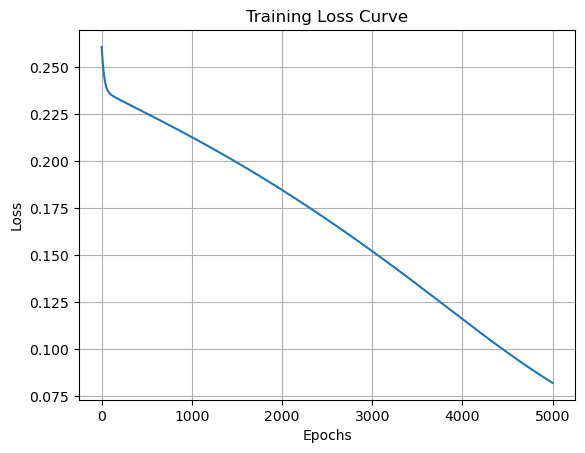

In [17]:

plt.plot(mlp.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


### 🔍 Test Predictions

In [20]:

predictions = mlp.predict(X)
print("Predictions:")
print(predictions)


Predictions:
[[0]
 [1]
 [1]
 [0]]



## ✅ Conclusion

- You now know how to build an MLP from scratch.
- You understand forward & backward propagation.
- You trained an MLP on the XOR problem!

---

🔁 Try changing hidden layer size or learning rate to explore more!
